# 2. AE 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리

df = pd.read_csv('C:\\Users\\akasa\\Downloads\\ae_data.csv')
df

time  y        x1        x2        x3          x4        x5  \
0        5/1/99 0:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1        5/1/99 0:02  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2        5/1/99 0:04  0  0.363848 -4.681394 -4.353147   14.127997 -0.138636   
3        5/1/99 0:06  0  0.301590 -4.758934 -4.023612   13.161566 -0.148142   
4        5/1/99 0:08  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...              ... ..       ...       ...       ...         ...       ...   
18393  5/28/99 23:58  0 -0.877441  0.786430  0.406426  135.301215  0.112295   
18394   5/29/99 0:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395   5/29/99 0:02  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396   5/29/99 0:04  0 -0.822843  0.419383  0.387263  135.658942  0.199422   
18397   5/29/99 0:06  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6        x7        x8  ...        x52       x53       x54  \
0     -20.669883  0.000732 -0.061114  ...  10.091721  0.053279 -4.936434   
1     -18.758079  0.000732 -0.061114  ...  10.095871  0.062801 -4.937179   
2     -17.836632  0.010803 -0.061114  ...  10.100265  0.072322 -4.937924   
3     -18.517601  0.002075 -0.061114  ...  10.104660  0.081600 -4.938669   
4     -17.505913  0.000732 -0.061114  ...  10.109054  0.091121 -4.939414   
...          ...       ...       ...  ...        ...       ...       ...   
18393  26.300392 -0.159185  0.058823  ...  -0.773514 -0.752385  2.682413   
18394  25.678597 -0.159185  0.058823  ...  -0.773514 -0.752385  2.683338   
18395  25.056801 -0.159185  0.048752  ...  -0.773514 -0.752385  2.684263   
18396  24.435005 -0.159185  0.048752  ...  -0.773514 -0.752385  2.685189   
18397  24.712960 -0.159185  0.048752  ...  -0.773514 -0.752385  2.686114   

             x55        x56       x57       x58       x59       x60  x61  
0     -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076    0  
1     -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083    0  
2     -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090    0  
3     -35.954281  21.672449  3.986095  0.033721  2.554880  0.006097    0  
4     -37.724789  21.907251  3.601573  0.033777  1.410494  0.006105    0  
...          ...        ...       ...       ...       ...       ...  ...  
18393   6.944644 -37.795661 -0.860218  0.010220  0.895685 -0.011242    0  
18394   0.507755 -39.357199 -0.915698  0.010620  0.175348 -0.011235    0  
18395   2.809146 -39.357199 -1.409596  0.013323  0.621020 -0.011228    0  
18396   2.164859 -39.357199 -0.860218  0.012888  1.390902 -0.011221    0  
18397   1.416690 -39.357199 -0.732044  0.012453  0.418993 -0.011214    0  

[18398 rows x 63 columns]

In [3]:
df['y'].value_counts()

y
0    18274
1      124
Name: count, dtype: int64

In [4]:
df['x61'].value_counts()

x61
0    18379
1       19
Name: count, dtype: int64

In [5]:
df.shape

(18398, 63)

In [6]:
df.isnull().values.any()

False

In [7]:
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61'],
      dtype='object')

In [8]:
Labels = ['Normal','Fraud']

In [9]:
count_classes = pd.value_counts(df['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), Labels)
plt.xlabel("y")
plt.ylabel("Frequency");

C:\Users\akasa\AppData\Local\Temp\ipykernel_16972\3323807224.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['y'], sort = True)


In [10]:
#데이터 전처리 - time label preprocessing
df['time'] = pd.to_datetime(df['time'])

# 기준 시간 (가장 오래된 시간)을 기준으로 시간 간격을 초 단위로 변환
df['time_delta'] = (df['time'] - df['time'].min()).dt.total_seconds()

# 변환된 데이터 확인
print(df[['time', 'time_delta']].head())

C:\Users\akasa\AppData\Local\Temp\ipykernel_16972\1662784135.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


                 time  time_delta
0 1999-05-01 00:00:00         0.0
1 1999-05-01 00:02:00       120.0
2 1999-05-01 00:04:00       240.0
3 1999-05-01 00:06:00       360.0
4 1999-05-01 00:08:00       480.0


In [11]:
df = df.drop('time',axis=1)

In [12]:
frauds = df[df.y == 1]
normal = df[df.y == 0]
print(frauds.shape)
print(normal.shape)

(124, 63)
(18274, 63)


In [13]:
frauds = df[df.y == 1]
normal = df[df.y == 0]
print(frauds.shape)
print(normal.shape)

(124, 63)
(18274, 63)


In [14]:
from sklearn.preprocessing import StandardScaler
#상관관계 분석을 위한 코드
def scaler(data):
    data_X = data.drop('y',axis=1)
    data_y = data['y']
    
    scaler = StandardScaler()
    data_X_scaled = scaler.fit_transform(data_X)
    
    data_scaled = pd.DataFrame(data_X_scaled,columns=data_X.columns)
    data_scaled['y'] = data_y.reset_index(drop=True)
    return data_scaled
    
fraud_scaled = scaler(frauds)
print(fraud_scaled)

normal_scaled = scaler(normal)
print(normal_scaled)

           x1        x2        x3        x4        x5        x6        x7  \
0    0.897573 -1.387465 -0.385815 -0.102502 -0.615844  0.583128 -0.188381   
1   -1.009471 -1.177878 -1.593009 -2.504451 -1.053621  0.786025  0.110952   
2   -0.912659  0.621614  2.108685  0.770073 -0.841943  0.099753  0.261760   
3   -1.020000  0.901232  1.199621  1.073265 -0.033171  0.441201 -0.150683   
4   -1.498661  0.512733  1.540598  0.111996 -1.327312  0.546469 -0.862459   
..        ...       ...       ...       ...       ...       ...       ...   
119 -0.166030 -0.115006  0.311406  0.467355 -0.590436  1.476976 -0.487714   
120  0.001573  1.519024  2.240305  0.371390  0.812158  1.179186 -0.563126   
121  0.144629  1.118812  1.691916  0.426959 -0.551435  1.339385 -1.010984   
122 -0.033076 -1.467567 -1.617666  1.188935 -0.300573  1.422698 -0.263785   
123 -0.935054 -0.637404 -0.357667  1.044452 -0.111079  1.114193 -0.263785   

           x8        x9       x10  ...       x54       x55       x56  \
0  

In [15]:
fraud_scaled.isnull().sum
normal_scaled.isnull().sum

print(fraud_scaled)
print(normal_scaled)

           x1        x2        x3        x4        x5        x6        x7  \
0    0.897573 -1.387465 -0.385815 -0.102502 -0.615844  0.583128 -0.188381   
1   -1.009471 -1.177878 -1.593009 -2.504451 -1.053621  0.786025  0.110952   
2   -0.912659  0.621614  2.108685  0.770073 -0.841943  0.099753  0.261760   
3   -1.020000  0.901232  1.199621  1.073265 -0.033171  0.441201 -0.150683   
4   -1.498661  0.512733  1.540598  0.111996 -1.327312  0.546469 -0.862459   
..        ...       ...       ...       ...       ...       ...       ...   
119 -0.166030 -0.115006  0.311406  0.467355 -0.590436  1.476976 -0.487714   
120  0.001573  1.519024  2.240305  0.371390  0.812158  1.179186 -0.563126   
121  0.144629  1.118812  1.691916  0.426959 -0.551435  1.339385 -1.010984   
122 -0.033076 -1.467567 -1.617666  1.188935 -0.300573  1.422698 -0.263785   
123 -0.935054 -0.637404 -0.357667  1.044452 -0.111079  1.114193 -0.263785   

           x8        x9       x10  ...       x54       x55       x56  \
0  

In [16]:
# 스케일링 대상인 데이터 타입 확인
print(fraud_scaled.dtypes)
print(normal_scaled.dtypes)

x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
               ...   
x59           float64
x60           float64
x61           float64
time_delta    float64
y               int64
Length: 63, dtype: object
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
               ...   
x59           float64
x60           float64
x61           float64
time_delta    float64
y               int64
Length: 63, dtype: object


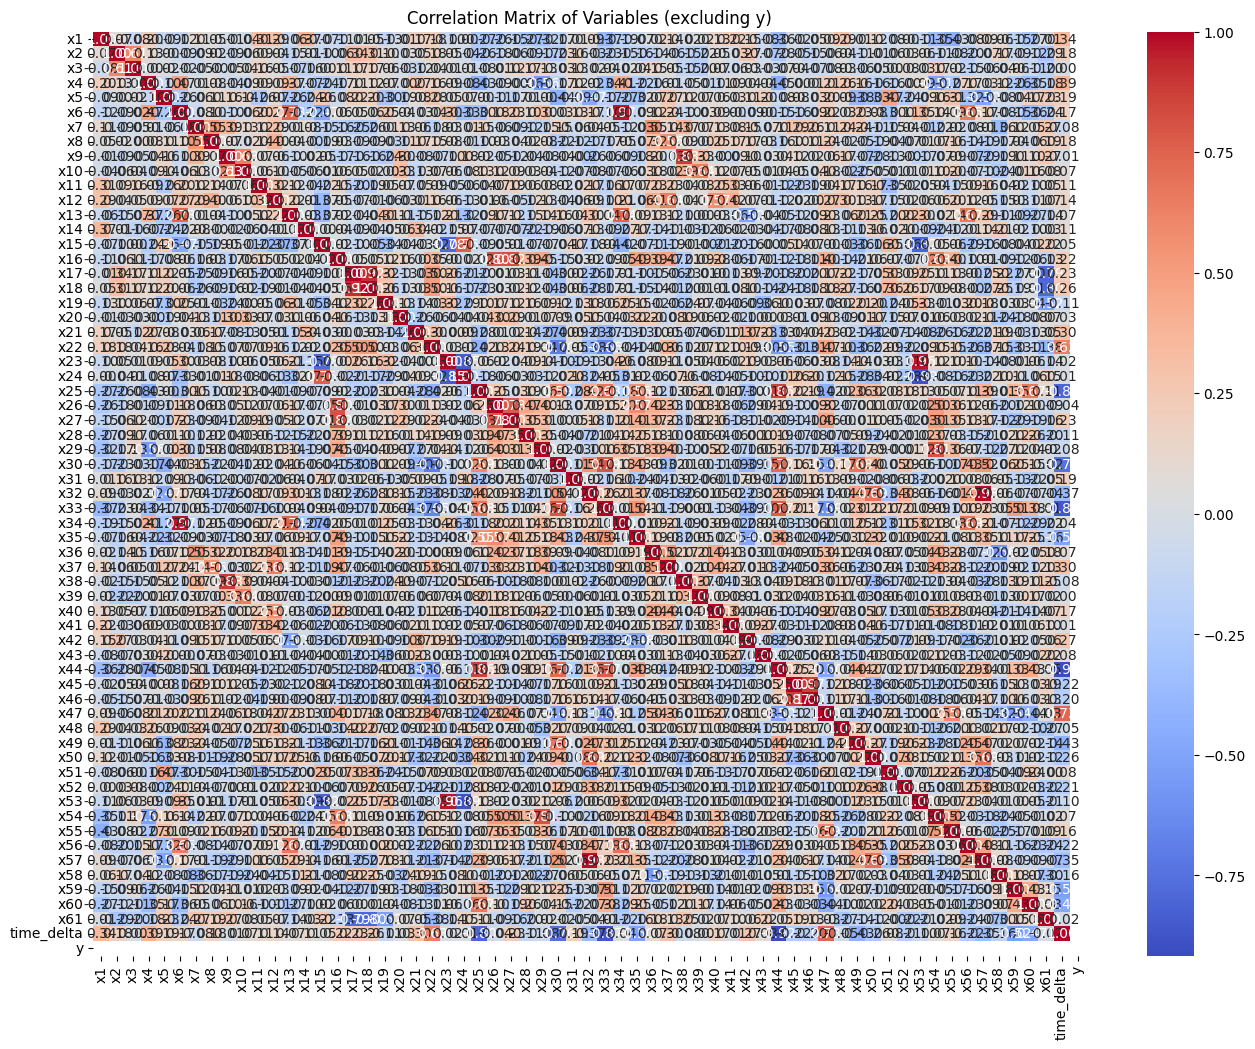

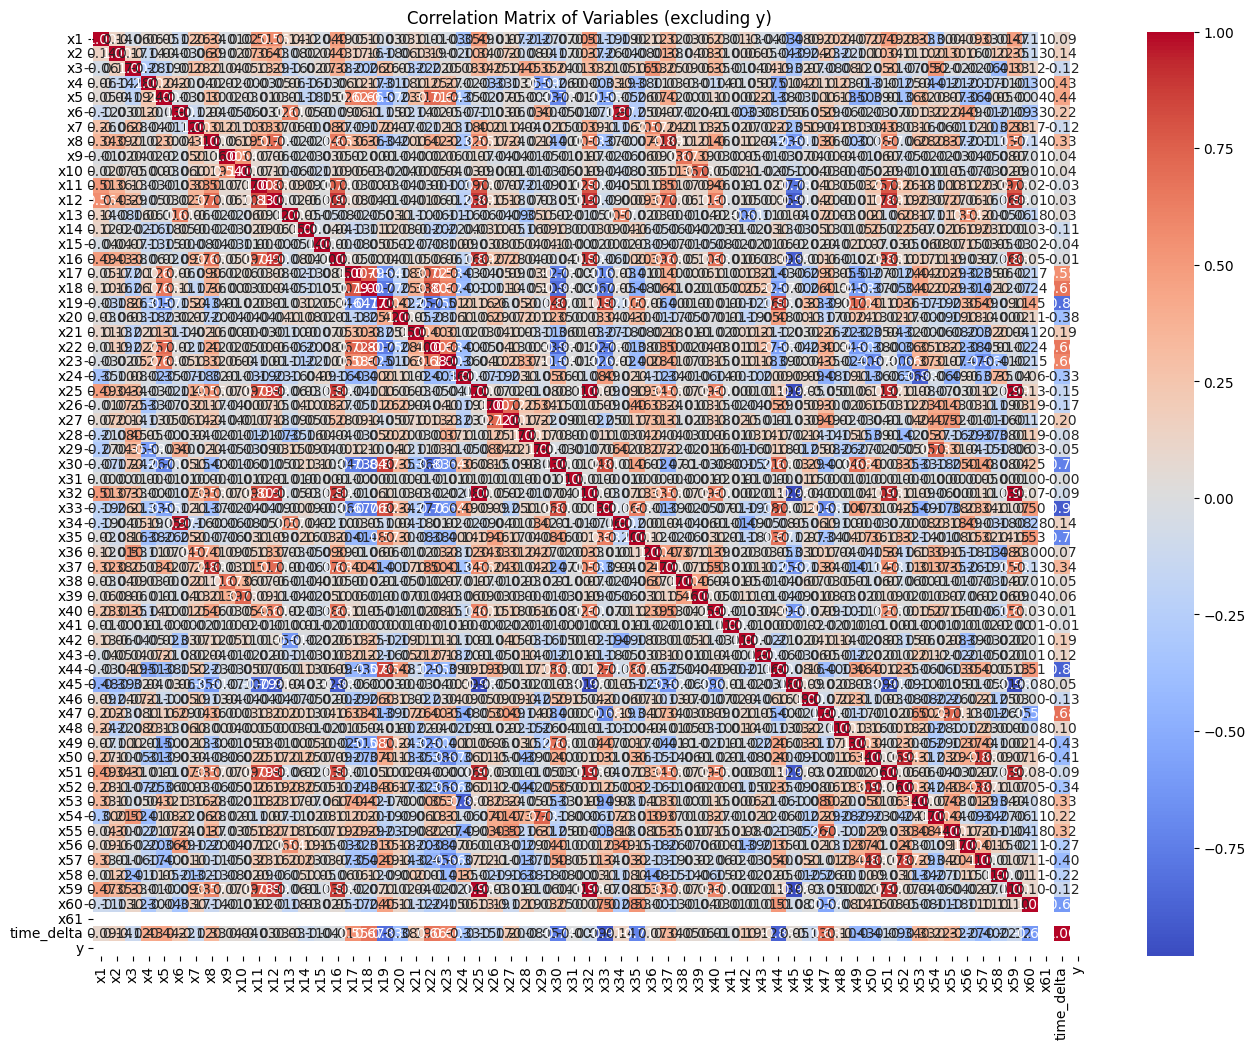

In [17]:
import seaborn as sns

#변수들 간의 상관관계 계산
correlation_matrix = fraud_scaled.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables (excluding y)")
plt.show()

#변수들 간의 상관관계 계산
correlation_matrix = normal_scaled.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables (excluding y)")
plt.show()

In [18]:
#data 분리
from sklearn.model_selection import train_test_split

# 정상 데이터에서 train, val, test 분할 (이상치 데이터는 테스트에서만 사용)
train_data, temp_data = train_test_split(normal_scaled, test_size=0.4, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# 테스트 데이터에는 정상 데이터와 이상치 데이터를 모두 포함
test_data = pd.concat([test_data, fraud_scaled])
test_target = test_data['y']

# 테스트 데이터 셔플
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_target = test_target.sample(frac=1, random_state=42).reset_index(drop=True)

#AE는 비지도학습이므로 y 제거
test_data = test_data.drop(['y'], axis=1)
train_data = train_data.drop(['y'], axis=1)
val_data = val_data.drop(['y'], axis=1)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(test_target)

(10964, 62)
(3779, 62)
(3655, 62)
0       0
1       0
2       0
3       0
4       0
       ..
3774    0
3775    0
3776    0
3777    0
3778    0
Name: y, Length: 3779, dtype: int64


In [19]:
#AE 모델 생성 및 학습
# 오토인코더 모델
input_dim = train_data.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [20]:
history = autoencoder.fit(train_data, train_data, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data =(val_data,val_data))

Epoch 1/50
43/43 [==============================] - 2s 13ms/step - loss: 1.2213 - val_loss: 1.1689
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 1.1350 - val_loss: 1.0344
Epoch 3/50
43/43 [==============================] - 0s 6ms/step - loss: 0.9943 - val_loss: 0.9218
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.9234 - val_loss: 0.8869
Epoch 5/50
43/43 [==============================] - 0s 6ms/step - loss: 0.9005 - val_loss: 0.8694
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.8826 - val_loss: 0.8527
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.8667 - val_loss: 0.8376
Epoch 8/50
43/43 [==============================] - 0s 7ms/step - loss: 0.8527 - val_loss: 0.8256
Epoch 9/50
43/43 [==============================] - 0s 7ms/step - loss: 0.8426 - val_loss: 0.8176
Epoch 10/50
43/43 [==============================] - 0s 6ms/step - loss: 0.8360 - val_loss: 0.8119
Epoch 11/50
43/43 

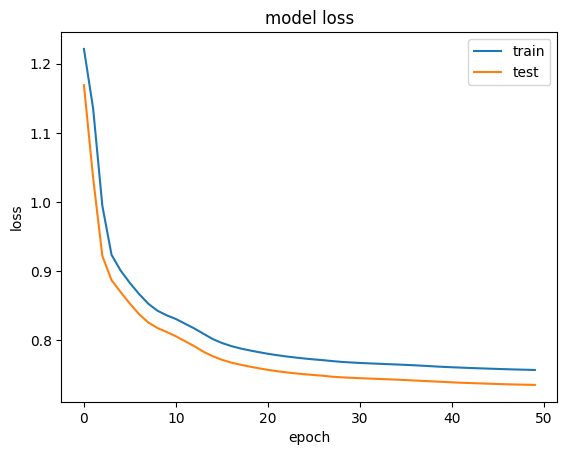

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [22]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': test_target})
error_df.describe()

119/119 [==============================] - 1s 2ms/step


reconstruction_error   true_class
count           3779.000000  3779.000000
mean               0.766824     0.032813
std                1.574597     0.178170
min                0.175760     0.000000
25%                0.403907     0.000000
50%                0.505735     0.000000
75%                0.672949     0.000000
max               18.334155     1.000000

In [23]:
error_df.head()

reconstruction_error  true_class
0              0.445743           0
1              0.451562           0
2              0.774941           0
3              0.496749           0
4              0.379229           0

In [24]:
threshold= 5
#import numpy as np

# 정상 데이터의 재구성 오류 계산
#normal_reconstruction_error = np.mean((train_data - autoencoder.predict(train_data))**2, axis=1)

# 평균과 표준편차 계산
#mean_error = np.mean(normal_reconstruction_error)
#std_error = np.std(normal_reconstruction_error)

# 임계값 설정 (평균 + 3 표준편차)
#threshold = mean_error + 3 * std_error


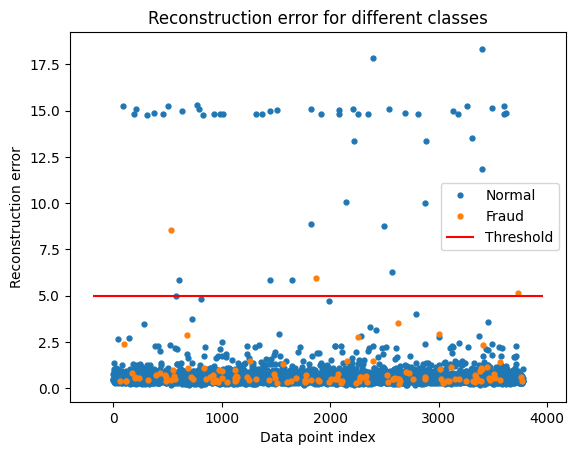

In [25]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

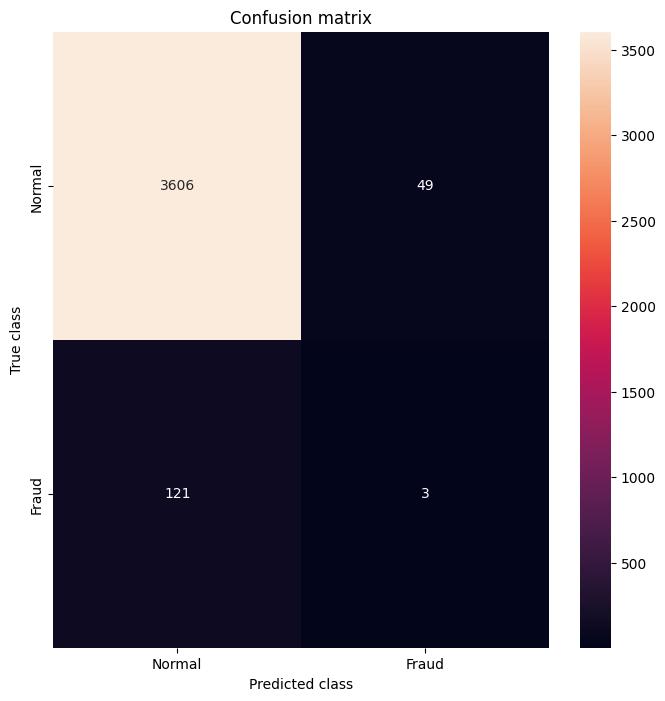

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3655
           1       0.06      0.02      0.03       124

    accuracy                           0.96      3779
   macro avg       0.51      0.51      0.51      3779
weighted avg       0.94      0.96      0.95      3779



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [27]:
# 재구성 오류 계산
reconstruction_error = np.mean((test_data - autoencoder.predict(test_data))**2, axis=1)

# 재구성 오류가 임계값을 초과하면 이상치로 간주
y_pred = (reconstruction_error > threshold).astype(int)

from sklearn.metrics import accuracy_score

# test_target에는 실제 라벨(정상: 0, 이상치: 1)이 저장되어 있다고 가정
accuracy = accuracy_score(test_target, y_pred)

print(f"Accuracy: {accuracy:.4f}")


119/119 [==============================] - 0s 2ms/step
Accuracy: 0.9550
